In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define main variables
image_path = r"C:\Users\Student\Downloads\scene.jpg"
G = 256

# Function to display an image using matplotlib
def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Function to calculate histogram of grayscale image
def histogram(gray):
    hist = np.array([0]*G)
    for row in gray:
        for pixel in row:
            hist[pixel] += 1
    return hist

# Function to plot histogram
def plot_histogram(hist, width=0.5, figsize=(15,5), xlabel='Intensity', ylabel='Frequency', title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(list(range(len(hist))), hist, width=width)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()


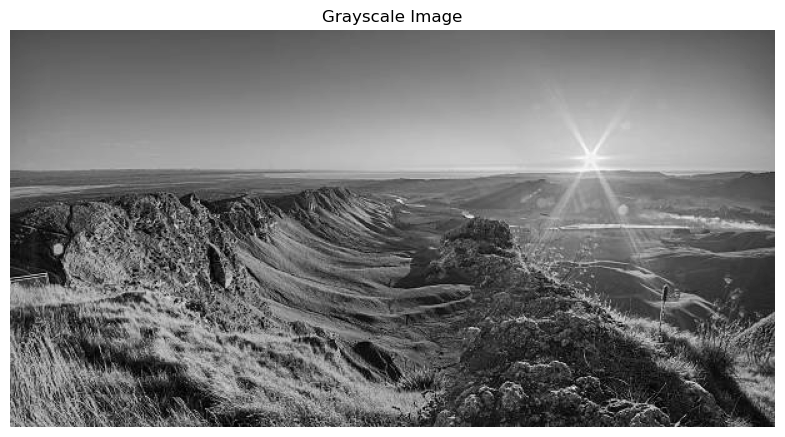

In [6]:
# Read Image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')

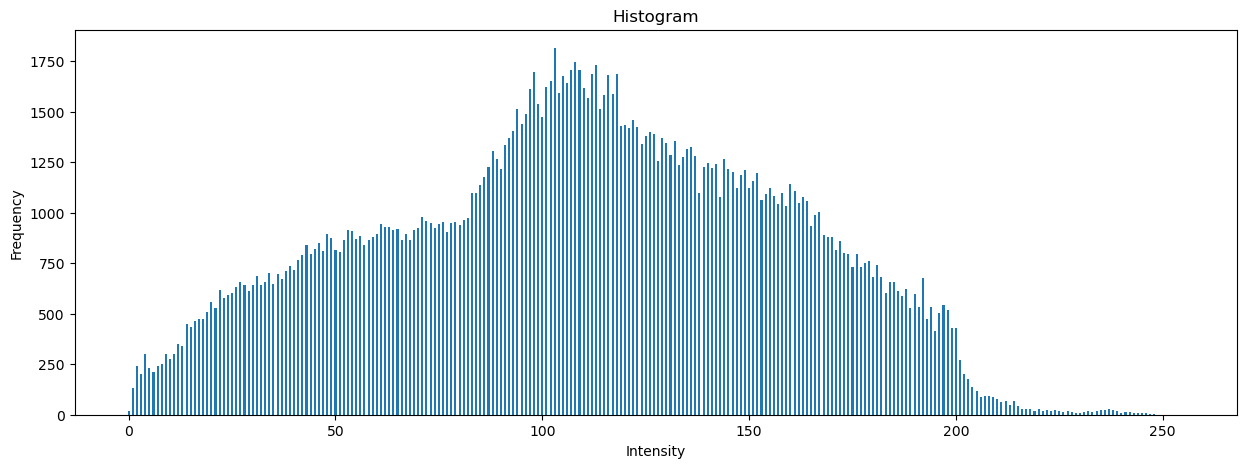

In [7]:
# Compute Histogram
hist = histogram(gray)
plot_histogram(hist)

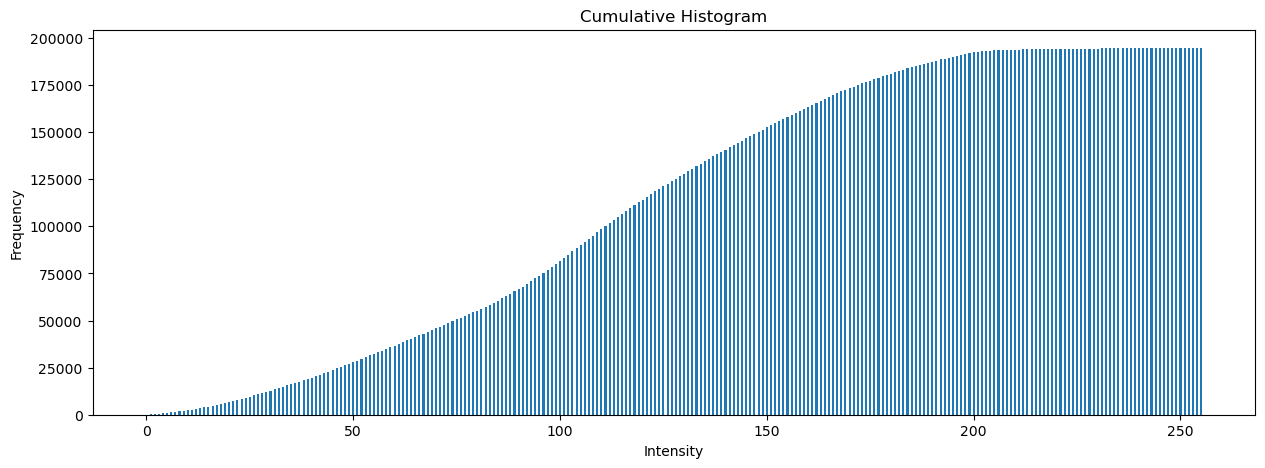

In [8]:
# Compute Cumulative Histogram
hist_cum = hist.copy()
for i in range(1,len(hist)):
    hist_cum[i] += hist_cum[i-1]
plot_histogram(hist_cum, title='Cumulative Histogram')

Before Histogram Equalization:


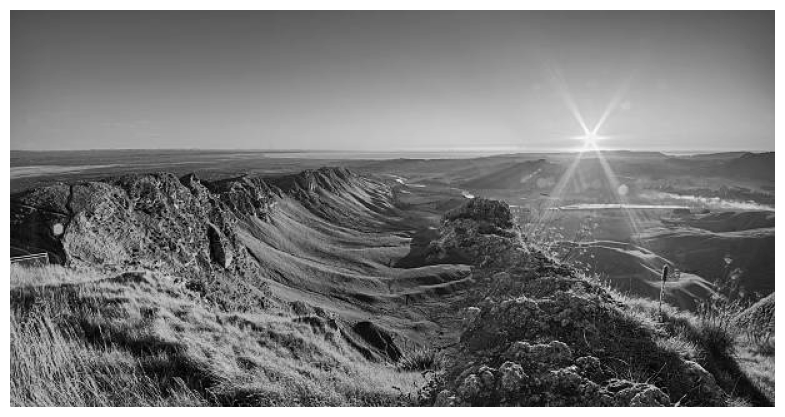

After Histogram Equalization:


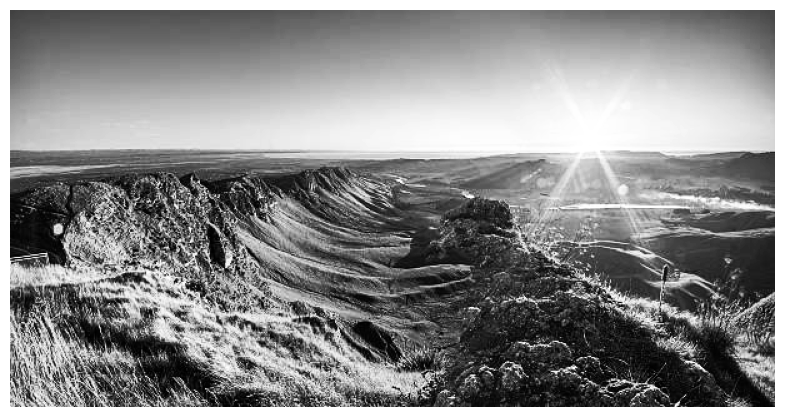

In [10]:
# Histogram Equalization
t = np.round((G-1)/(gray.shape[0]*gray.shape[1]) * hist_cum)
output = gray.copy()
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        output[i,j] = t[output[i,j]]
# Display original and equalized images
print("Before Histogram Equalization:")
plotimage(gray)
print("After Histogram Equalization:")
plotimage(output)

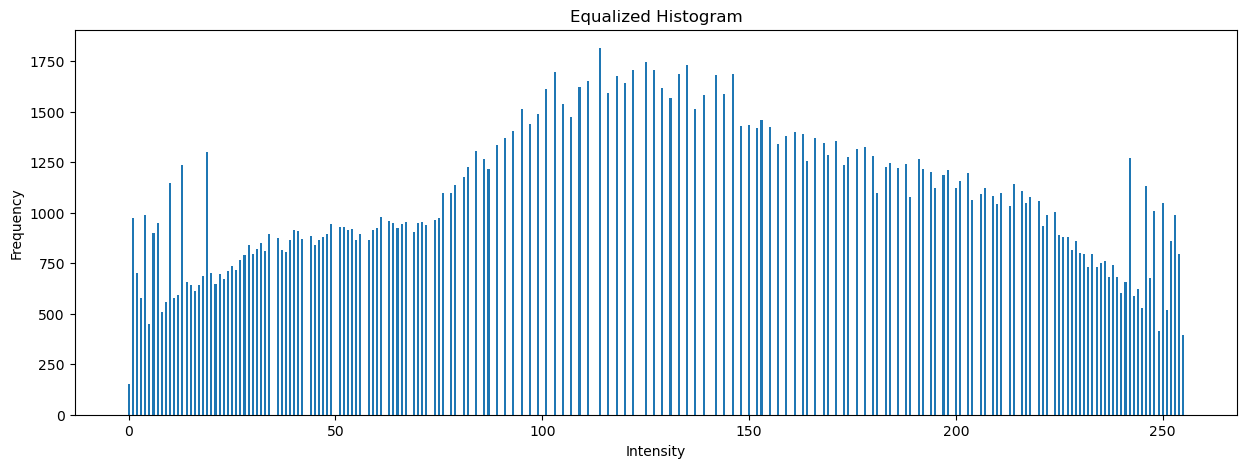

In [11]:
# Compute and plot equalized histogram
hist_after = histogram(output)
plot_histogram(hist_after, title="Equalized Histogram")